In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("D:\Study\BA\TEST\Decision tree\Bank_Personal_Loan_Modelling.xlsx",'Data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

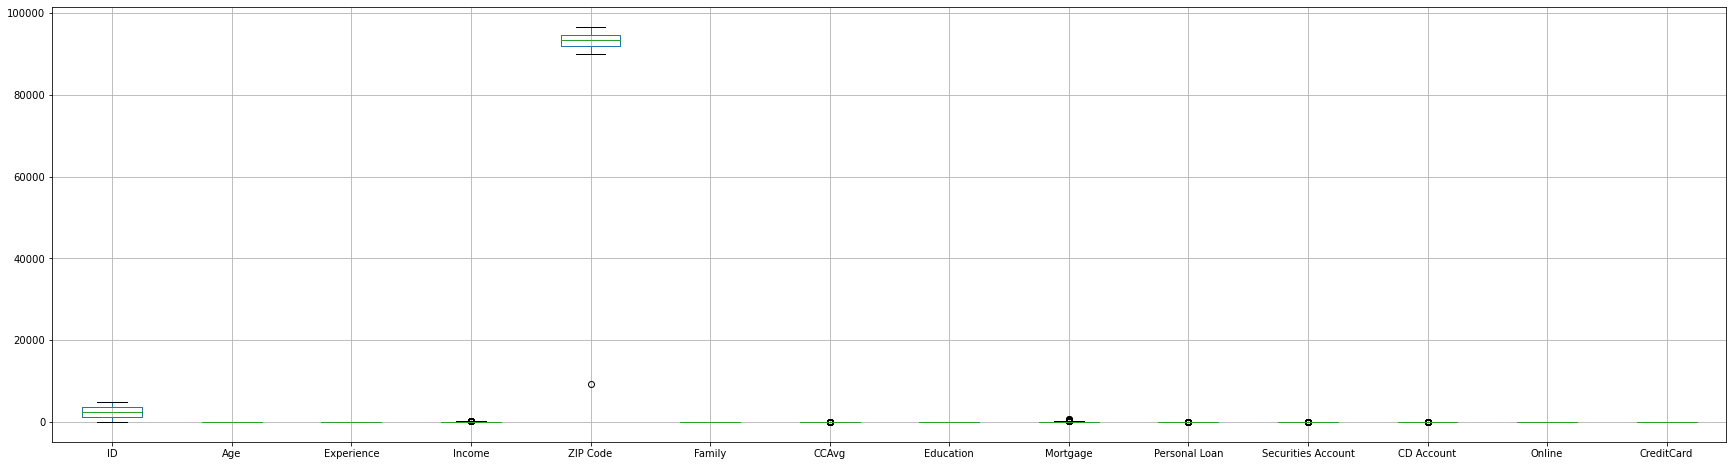

In [7]:
df.boxplot(figsize=(30,8))

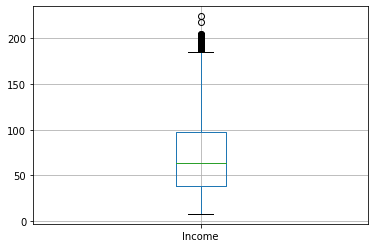

In [8]:
df.boxplot('Income')

In [9]:
min=df['Income'].quantile(0.05)
max=df['Income'].quantile(0.95)
new=np.where(df['Income']<min,min,df['Income'])
df.Income=new
new=np.where(df['Income']>max,max,df['Income'])
df.Income=new

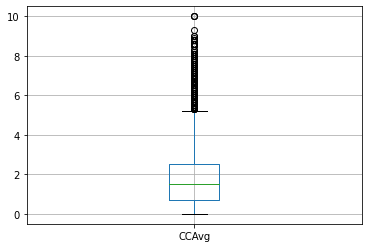

In [10]:
df.boxplot('CCAvg')

In [11]:
min=df['CCAvg'].quantile(0.05)
max=df['CCAvg'].quantile(0.90)
new=np.where(df['CCAvg']<min,min,df['CCAvg'])
df.CCAvg=new
new=np.where(df['CCAvg']>max,max,df['CCAvg'])
df.CCAvg=new

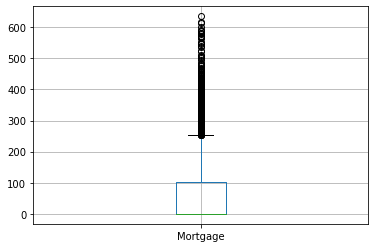

In [12]:
df.boxplot('Mortgage')

In [13]:
min=df['Mortgage'].quantile(0.05)
max=df['Mortgage'].quantile(0.90)
new=np.where(df['Mortgage']<min,min,df['Mortgage'])
df.Mortgage=new
new=np.where(df['Mortgage']>max,max,df['Mortgage'])
df.Mortgage=new

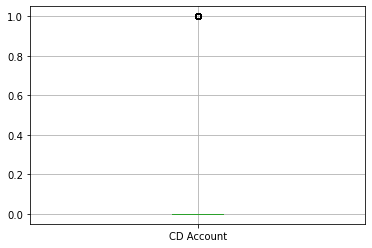

In [14]:
df.boxplot('CD Account')

In [15]:
df = df.drop(['ID','ZIP Code'],axis=1)

In [16]:
corr = df.corr()

In [17]:
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.053890,-0.046418,-0.051230,0.041334,-0.009965,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.044836,-0.052563,-0.050391,0.013152,-0.008621,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.053890,-0.044836,1.000000,-0.158695,0.624282,-0.191516,0.096538,0.503607,-0.000971,0.170134,0.013482,-0.001984
Family,-0.046418,-0.052563,-0.158695,1.000000,-0.098948,0.064929,-0.003729,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.051230,-0.050391,0.624282,-0.098948,1.000000,-0.119144,0.049374,0.372207,0.021051,0.135428,-0.005924,-0.006832
Education,0.041334,0.013152,-0.191516,0.064929,-0.119144,1.000000,-0.015474,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.009965,-0.008621,0.096538,-0.003729,0.049374,-0.015474,1.000000,0.072687,-0.004362,0.060024,-0.007614,-0.003204
Personal Loan,-0.007726,-0.007413,0.503607,0.061367,0.372207,0.136722,0.072687,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.000971,0.019994,0.021051,-0.010812,-0.004362,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.170134,0.014110,0.135428,0.013934,0.060024,0.316355,0.317034,1.000000,0.175880,0.278644


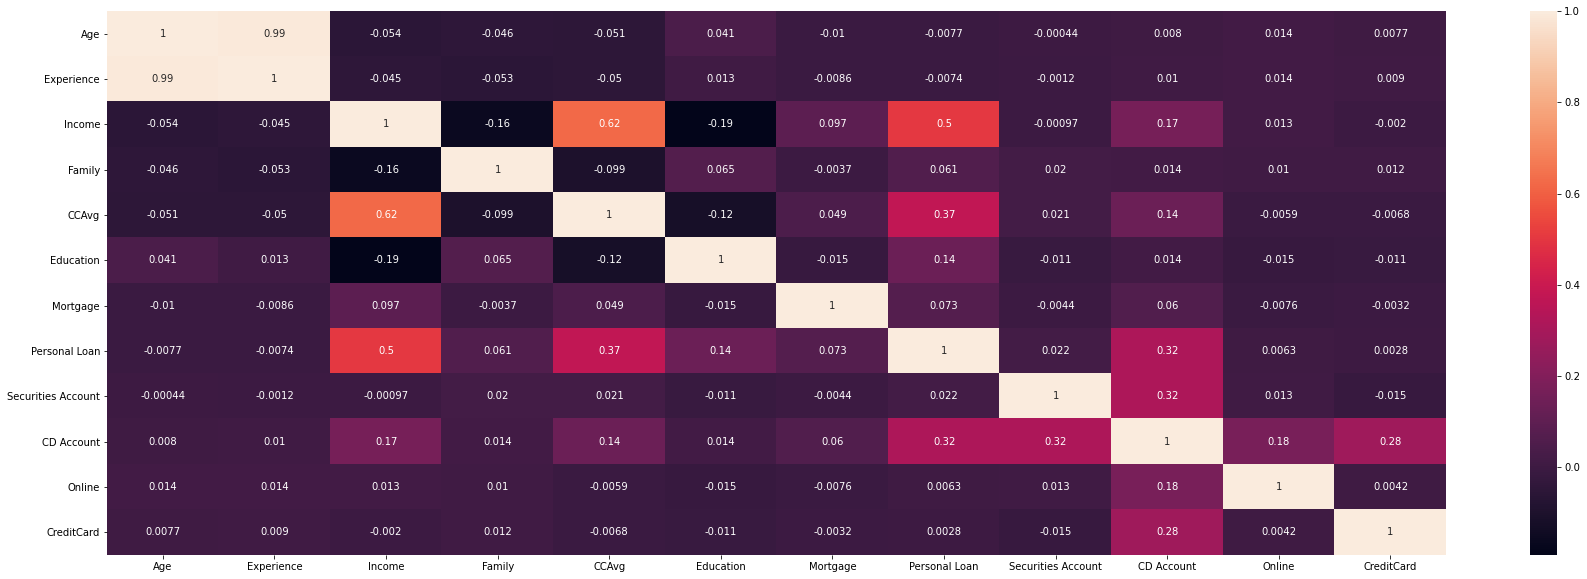

In [18]:
plt.subplots(figsize = (30,10))
sns.heatmap(corr,annot=True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
y = df['Personal Loan']

In [22]:
x = df.drop(['Personal Loan'],axis=1)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
clf = DecisionTreeClassifier(random_state=0)

In [25]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
y_pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.9813333333333333

In [29]:
from sklearn import tree

[Text(1016.6820652173913, 524.1857142857143, 'X[2] <= 113.5\ngini = 0.173\nsamples = 3500\nvalue = [3166, 334]'),
 Text(504.92934782608694, 485.3571428571429, 'X[4] <= 2.95\ngini = 0.04\nsamples = 2826\nvalue = [2769, 57]'),
 Text(145.56521739130434, 446.52857142857147, 'X[2] <= 106.5\ngini = 0.005\nsamples = 2614\nvalue = [2608, 6]'),
 Text(109.17391304347825, 407.70000000000005, 'gini = 0.0\nsamples = 2546\nvalue = [2546, 0]'),
 Text(181.95652173913044, 407.70000000000005, 'X[2] <= 108.5\ngini = 0.161\nsamples = 68\nvalue = [62, 6]'),
 Text(72.78260869565217, 368.8714285714286, 'X[4] <= 1.85\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(36.391304347826086, 330.0428571428572, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(109.17391304347825, 330.0428571428572, 'X[5] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(72.78260869565217, 291.2142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(145.56521739130434, 291.2142857142857, 'gini = 0.0\nsamples = 2\nv

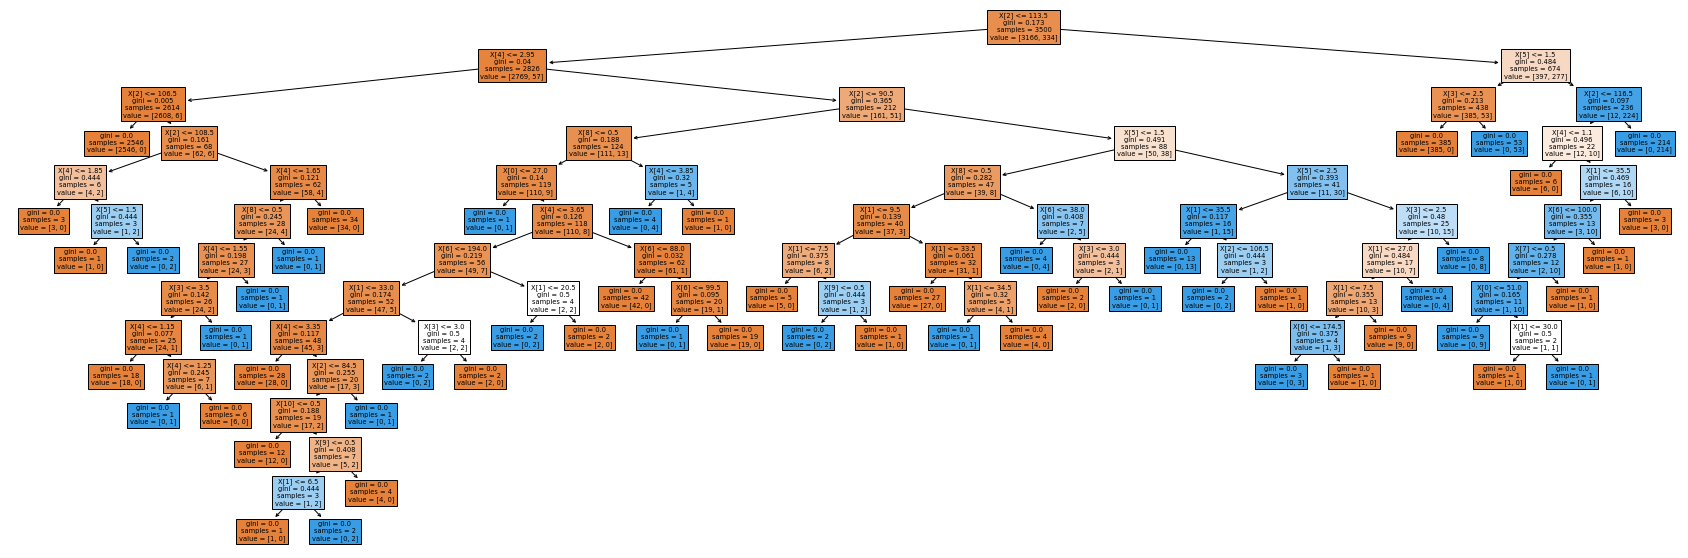

In [30]:
plt.subplots(figsize = (30,10))
tree.plot_tree(clf,filled=True)